> Group Members

>> Vedanta Gawande

>> Shashank Singh

>> Jai Bobal

> Project Description
>> This is the Part-2 of the CMSC320 Final Group Project. The database we've chosen is the European Soccer Database, containing 25k+ matches, players & teams attributes for European Professional Football.
>> Part-2 of the project has two sections, "***Data Preprocessing***" and "***Basic Data Exploration and Summary Stastic***"

## ***DATA PREPROCESSING***

In [43]:
import pandas as pd
import sqlite3

# First, we connect our database sqlite file.
conn = sqlite3.connect("/content/database.sqlite")
crsr = conn.cursor()

# Then, we query to find out what tables we have in our dataset.
query = "SELECT * FROM sqlite_master WHERE type = 'table'"
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [44]:
# We then query through the Country table to find that we have 11 countries in our database.
query = "SELECT * from Country"
countries = pd.read_sql(query, conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [45]:
# We then query through the League table to find that we have 11 leagues in our database.
# Each League corresponds to each of the 11 countries we found earlier.
query = "SELECT * from League"
leagues = pd.read_sql(query, conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [46]:
# Because we have a one-to-one correspondance for the two tables above, we can successfully merge them.
# We use the SQL query INNER JOIN to merge them.

query = "SELECT * FROM Country INNER JOIN League ON (Country.id = League.country_id);"
country_league = pd.read_sql(query, conn)

# Because both the tables have the same column 'id', we drop them as it is irrelevant information.
country_league = country_league.drop('id', axis=1)

# We now have a data frame containing the list of all the leagues by their country (11 items)
country_league

,name,country_id,name
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


In [47]:
# The original Match table has all the data of 25000+ matches and 115 columns.

# This query below selects the columns relevant to us for analysis and also
# joins the Match table with other tables to give us a complete dataframe with
# all the relevant important information like the Home and Away Team Names.

query = """SELECT Match.id as Match_ID,
                  Country.name AS Country,
                  League.name AS League,
                  season AS Season,
                  date AS Date,
                  home_teams.team_long_name AS Home_Team,
                  away_teams.team_long_name AS Away_Team,
                  home_team_goal	AS Home_Team_Goals,
                  away_team_goal AS Away_Team_Goals
          FROM Match
                  JOIN Country on Country.id = Match.country_id
                  JOIN League on League.id = Match.league_id
                  JOIN Team AS home_teams on home_teams.team_api_id = Match.home_team_api_id
                  JOIN Team AS away_teams on away_teams.team_api_id = Match.away_team_api_id;
        """

matches = pd.read_sql(query, conn)

# We clean the matches dataframe. Converting the Date column objects to datetime types.

matches['Date'] = pd.to_datetime(matches['Date'])
# matches.dtypes

matches['Outcome'] = matches.apply(lambda row:
                                              row['Home_Team'] if row['Home_Team_Goals'] > row['Away_Team_Goals']
                                        else (row['Away_Team'] if row['Away_Team_Goals'] > row['Home_Team_Goals']
                                        else 'Draw'), axis=1)

matches

,Match_ID,Country,League,Season,Date,Home_Team,Away_Team,Home_Team_Goals,Away_Team_Goals,Outcome
0,1,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,KRC Genk,Beerschot AC,1,1,Draw
1,2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,SV Zulte-Waregem,Sporting Lokeren,0,0,Draw
2,3,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht
3,4,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,KAA Gent,RAEC Mons,5,0,KAA Gent
4,5,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,FCV Dender EH,Standard de Liège,1,3,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...
25974,25975,Switzerland,Switzerland Super League,2015/2016,2015-09-22,FC St. Gallen,FC Thun,1,0,FC St. Gallen
25975,25976,Switzerland,Switzerland Super League,2015/2016,2015-09-23,FC Vaduz,FC Luzern,1,2,FC Luzern
25976,25977,Switzerland,Switzerland Super League,2015/2016,2015-09-23,Grasshopper Club Zürich,FC Sion,2,0,Grasshopper Club Zürich
25977,25978,Switzerland,Switzerland Super League,2015/2016,2015-09-22,Lugano,FC Zürich,0,0,Draw


In [48]:
query = "SELECT * from Player"
players = pd.read_sql(query, conn)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [49]:
query = "SELECT * from Player_Attributes ORDER BY overall_rating DESC"
player_attributes = pd.read_sql(query, conn)
player_attributes['date'] = pd.to_datetime(player_attributes['date'])
player_attributes.drop_duplicates(subset='player_api_id', keep='first', inplace=True)


# Calculate the overall goalkeeper rating by averaging the individual goalkeeper attributes
player_attributes['overall_gk_rating'] = player_attributes[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].mean(axis=1)
# Drop the original goalkeeper attribute columns
player_attributes.drop(['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], axis=1, inplace=True)

# Calculate the overall athleticism rating by averaging the individual player health/atheltic ability attributes
player_attributes['athleticism'] = player_attributes[['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'jumping', 'stamina', 'strength']].mean(axis=1)
# Drop the original health/atheltic ability attributes columns
player_attributes.drop(['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'jumping', 'stamina', 'strength'], axis=1, inplace=True)

# Calculating ball control
player_attributes['ball_control'] = player_attributes[['heading_accuracy', 'short_passing', 'long_passing', 'dribbling', 'volleys', 'ball_control', 'crossing', 'shot_power', 'long_shots', 'curve', 'free_kick_accuracy']].mean(axis=1)
# Drop the original ball control ability attributes columns
player_attributes.drop(['heading_accuracy', 'short_passing', 'long_passing', 'dribbling', 'volleys', 'crossing', 'shot_power', 'long_shots', 'curve', 'free_kick_accuracy'], axis=1, inplace=True)

# Calculate the overall skill rating
player_attributes['softer_game_skills'] = player_attributes[['positioning', 'aggression', 'interceptions', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'defensive_work_rate', 'attacking_work_rate', 'finishing']].mean(axis=1)
# Drop the original skill ability attributes columns
player_attributes.drop(['positioning', 'aggression', 'interceptions', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'defensive_work_rate', 'attacking_work_rate', 'finishing'], axis=1, inplace=True)

player_attributes

<ipython-input-49-c52ce4310356>:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_attributes['softer_game_skills'] = player_attributes[['positioning', 'aggression', 'interceptions', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'defensive_work_rate', 'attacking_work_rate', 'finishing']].mean(axis=1)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,ball_control,overall_gk_rating,athleticism,softer_game_skills
0,102483,158023,30981,2015-12-17,94.0,94.0,left,85.636364,10.8,83.250,52.666667
12,33331,20801,30893,2015-10-16,93.0,93.0,right,85.818182,11.6,86.375,57.888889
15,63876,1179,30717,2007-02-22,93.0,93.0,right,25.727273,89.8,67.625,42.000000
22,178976,54050,30829,2007-02-22,93.0,93.0,right,82.363636,22.4,87.625,69.666667
37,66758,1747,39989,2007-02-22,92.0,93.0,right,26.909091,89.4,65.250,33.000000
...,...,...,...,...,...,...,...,...,...,...,...
182593,86925,193658,127141,2010-08-30,47.0,65.0,right,48.363636,11.8,38.625,30.444444
182637,151372,224819,614951,2016-03-03,47.0,63.0,right,42.363636,12.2,60.500,44.111111
182693,20381,144071,22343,2008-08-30,46.0,53.0,right,41.555556,22.2,50.400,42.857143
182749,101947,186424,107283,2008-08-30,46.0,65.0,right,31.777778,18.6,54.000,31.142857


In [50]:
# We then merge the two dataframes players and player_attributes to form a single
# dataframe containing all the relevant information we need before we can move ahead
# for hypothesis testing.

player_ratings = pd.merge(player_attributes, players, on='player_api_id')

# Drop duplicates
player_ratings.drop_duplicates(inplace=True)

player_ratings['birthday'] = pd.to_datetime(player_ratings['birthday'])
player_ratings.sort_values(by='height', ascending=False, inplace= True)

# Dropping irrelevant columns
player_ratings.drop(columns=['id_x', 'player_fifa_api_id_x', 'id_y', 'player_fifa_api_id_y'], inplace=True)
player_ratings

,player_api_id,date,overall_rating,potential,preferred_foot,ball_control,overall_gk_rating,athleticism,softer_game_skills,player_name,birthday,height,weight
7641,148325,2015-10-30,67.0,67.0,right,20.545455,66.8,35.500,20.555556,Kristof van Hout,1987-02-09,208.28,243
4382,27372,2009-02-22,73.0,75.0,right,60.454545,22.4,69.125,52.555556,Stefan Maierhofer,1982-08-16,203.20,216
9233,39522,2011-08-30,64.0,72.0,right,19.636364,62.6,60.000,21.333333,Pietro Marino,1986-11-21,203.20,209
9913,543021,2016-05-12,62.0,74.0,right,17.636364,62.0,47.625,21.333333,Vanja Milinkovic-Savic,1997-02-20,203.20,203
10032,96465,2010-02-22,61.0,66.0,left,55.555556,25.2,65.800,45.857143,Kevin Vink,1984-07-30,203.20,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,11327,2009-02-22,71.0,75.0,right,66.545455,27.8,70.500,66.555556,Anthony Deroin,1979-03-15,162.56,146
9257,364813,2016-04-28,64.0,71.0,right,52.272727,11.6,65.875,59.111111,Samuel Asamoah,1994-03-23,162.56,132
1863,103139,2011-08-30,77.0,81.0,left,71.545455,12.8,70.000,46.000000,Diego Buonanotte,1988-04-19,160.02,123
1291,29587,2013-02-15,79.0,83.0,right,73.545455,9.6,76.000,59.888889,Maxi Moralez,1987-02-27,160.02,126


## ***DATA EXPLORATION AND HYPOTHESIS TESTING***

# *Hypothesis 1*

HO : Atheleticism doesn’t have direct influence on the overall rating of the player.

HA : Atheleticism has a direct influence on the overall rating of the player.

We’ll assume the alpha-value for this to be 0.05.

In [51]:
import scipy.stats as stats

z_score, p_value = stats.ttest_ind(player_ratings["overall_rating"],player_ratings["athleticism"], equal_var=False)

# Print the results of the t-test
print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: 29.9396435728199
P-value: 4.570075168279794e-193


Now as we can see the p-value is 4.570075168279794e-193. Also as we know higher value of p-value indicates weaker evidences for rejecting the null hypothesis and lower value of p-value indicates stronger evidences for rejecting the null hypothesis.

Now since our p-value is less than our alpha value, 0.05. Therefore we'll reject the null hypothesis and we'll move forward with the alternative hypothesis.

Hence we understand that Athleticism has a direct influence on the overall rating.

<Axes: xlabel='athleticism', ylabel='overall_rating'>

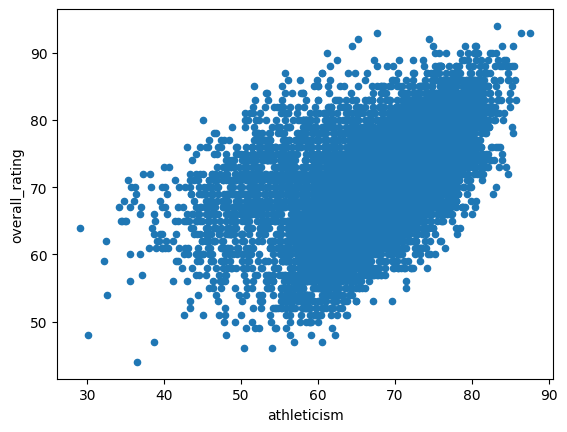

In [52]:
player_ratings.plot.scatter(x='athleticism', y='overall_rating')

# *Hypothesis 2*

HO : Foot preference has an effect on average athleticism of a player.

HA : Athleticism is not affected by a player's foot preference.

We'll assume the alpha-value for this to be 0.05.

In [53]:
import scipy.stats as stats

contingency_table = pd.crosstab(player_ratings['preferred_foot'], player_ratings['athleticism'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("P-value:", p_value)

Chi-square: 474.64874455891425
P-value: 0.8455062962928926


We can see that the p-value is greater than 0.05. This means that we can accept the null hypothesis.

Hence we can conclude that foor preference does infact have an affect on the average athleticism of the player

Here is the graph of the same:

<Axes: xlabel='preferred_foot'>

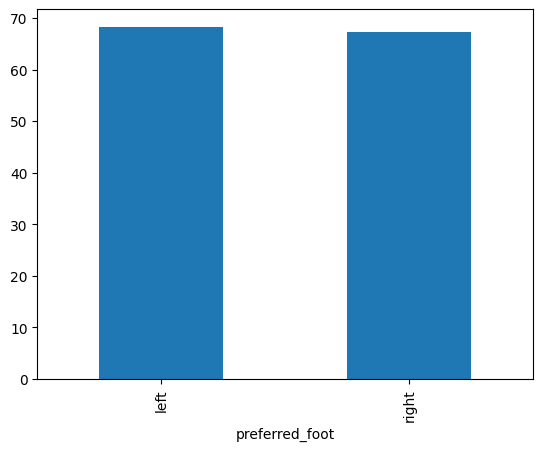

In [54]:
player_ratings.groupby('preferred_foot')['athleticism'].mean().plot(kind='bar')

# *Hypothesis 3*

HO: Being a HomeTeam doesn't give a team an advantage in a match and doesn't lead to higher chances of winning

HA: Being a HomeTeam does give a team an advantage in a match and leads to higher chances of winning

We'll assume the alpha-value for this to be 0.05.

We run a two-sample Z test as we have two independent data columns that are relevant for testing our hypothesis.

In [55]:
from statsmodels.stats.weightstats import ztest as ztest

# Extract home and away team goals
home_goals = matches['Home_Team_Goals']
away_goals = matches['Away_Team_Goals']

# Perform the two-sample z-test
ztest_stat, p_value = ztest(home_goals, away_goals)

# Print the results
print('z-statistic:', ztest_stat)
print('p-value:', p_value)

z-statistic: 35.779399930628294
p-value: 2.3097817776544093e-280


We can see that the p-value we have is below the alpha of 0.05. This means that we can reject the Null Hypothesis HO and accept the alternate hypothesis.

Hence we can conclude that being a home team does give that team an advantage in a match and it leads to higher chance of winning as well.

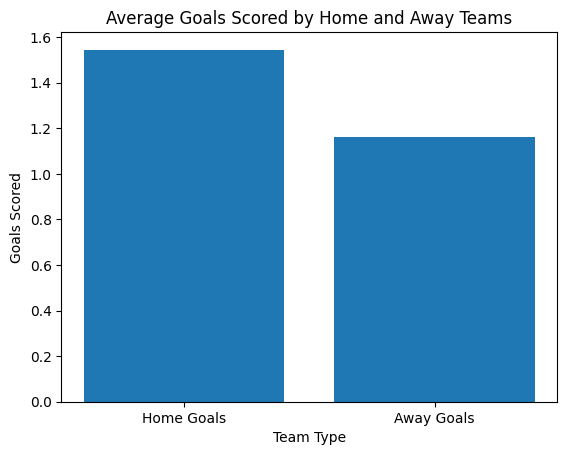

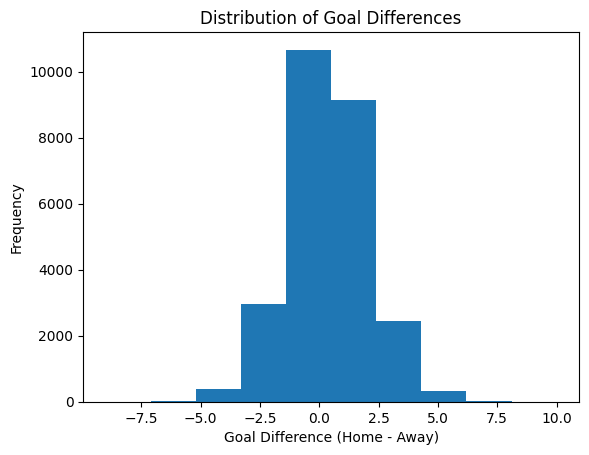

In [56]:
import matplotlib.pyplot as plt

# Create a bar chart of home goals and away goals
plt.bar(['Home Goals', 'Away Goals'], [home_goals.mean(), away_goals.mean()])
plt.title('Average Goals Scored by Home and Away Teams')
plt.xlabel('Team Type')
plt.ylabel('Goals Scored')
plt.show()

# Create a histogram of the difference in goals scored by home and away teams
plt.hist(home_goals - away_goals)
plt.title('Distribution of Goal Differences')
plt.xlabel('Goal Difference (Home - Away)')
plt.ylabel('Frequency')
plt.show()

We can see how in the graph titles Distribiution of Goal Differences, the goal difference is skewed towards Home Team. This further supports the statement we concluded using the Z test above.